In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [79]:
df1 = pd.read_csv(r"E:\Jupyter Notebooks\placement.csv") # classification problem
df2 = pd.read_csv(r"E:\Jupyter Notebooks\concrete_data.csv") # no linear relationship with target
df3 = pd.read_csv(r"E:\Jupyter Notebooks\data_science_job.csv") # classification problem
df4 = pd.read_csv(r"E:\Jupyter Notebooks\orders.csv") # target not given (unsupervised problem)

In [80]:
df4.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [81]:
df4.orders.value_counts()

1      294
2      133
3       72
4       58
5       47
      ... 
106      1
461      1
71       1
61       1
18       1
Name: orders, Length: 107, dtype: int64

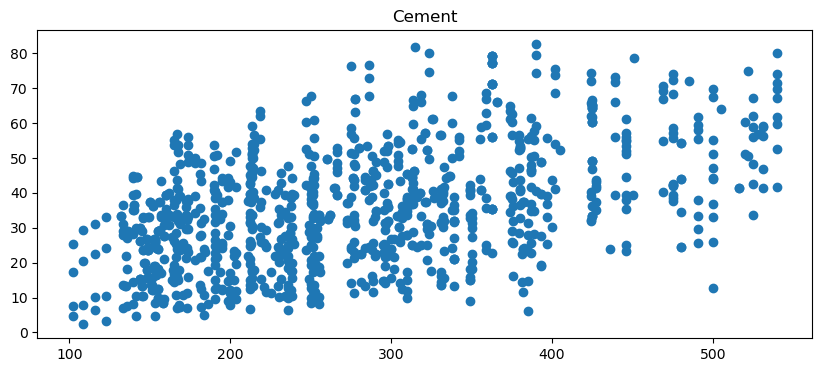

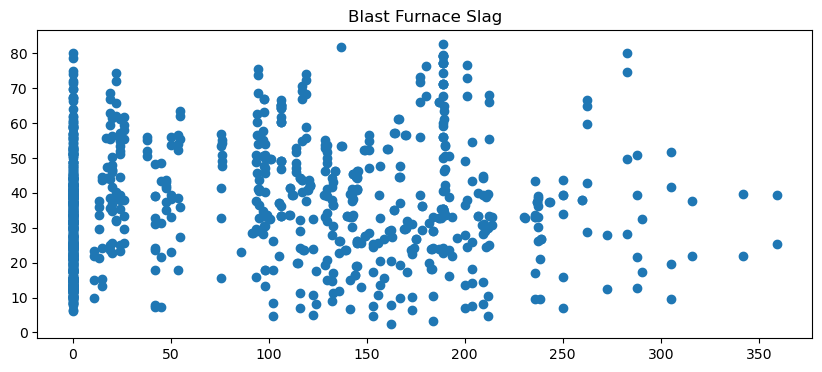

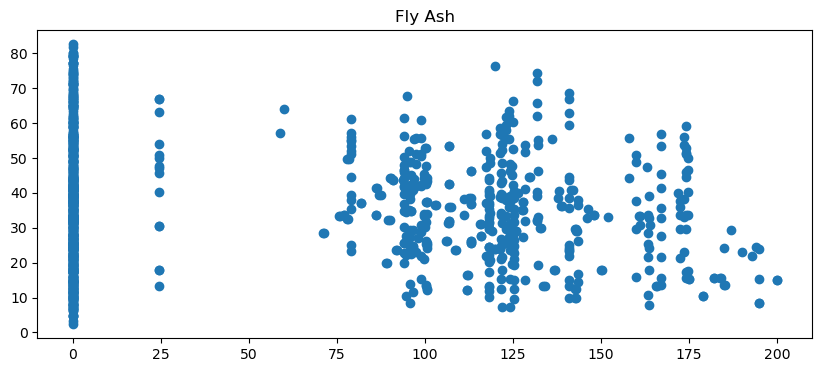

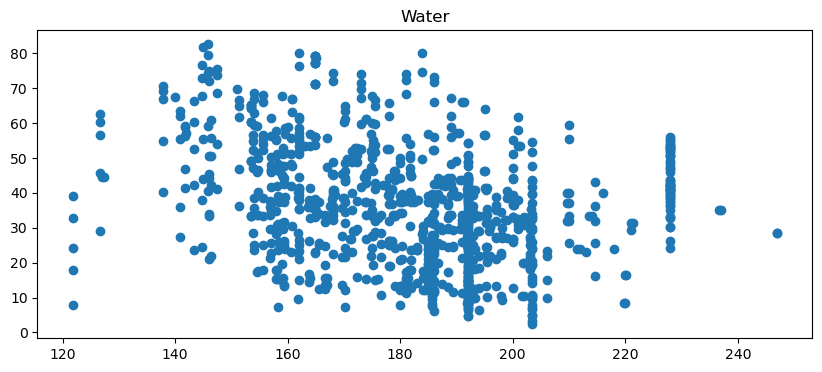

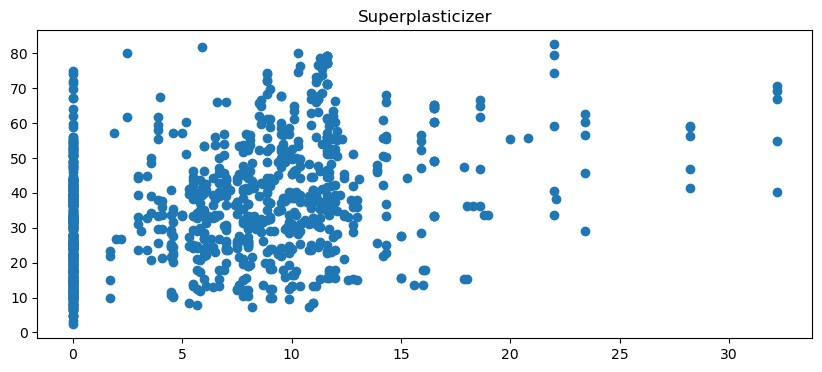

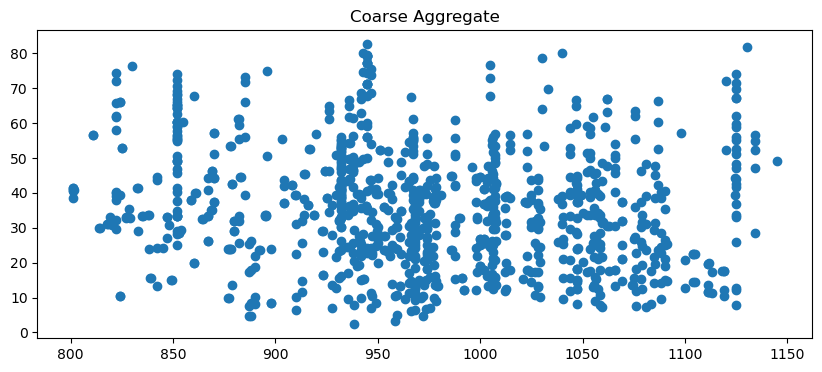

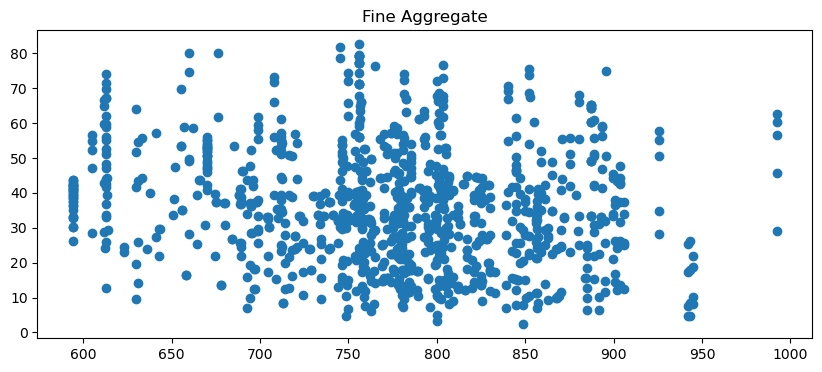

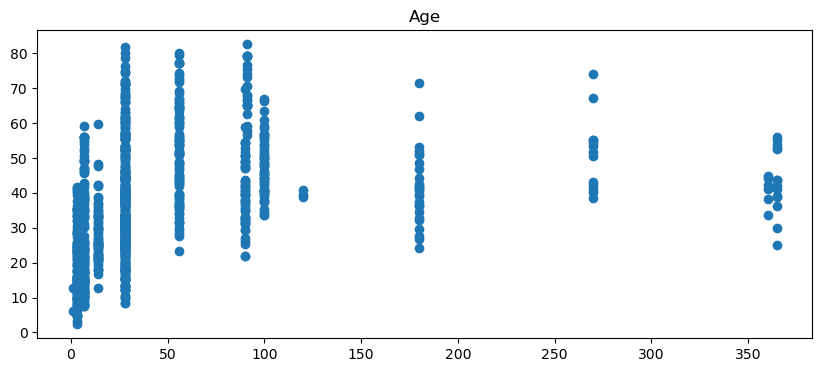

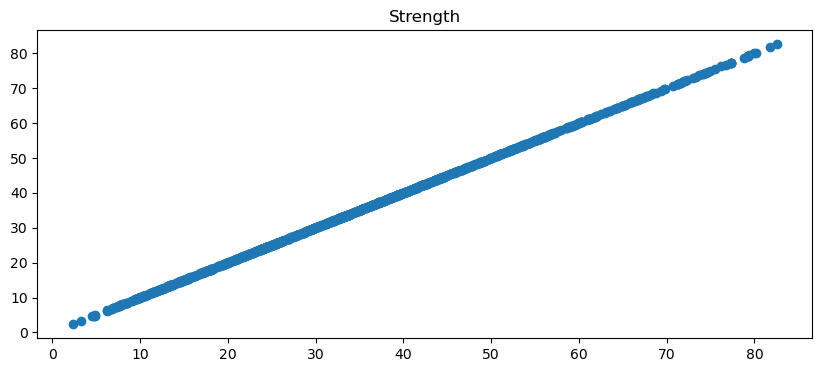

In [82]:
# none of the columns are linearly related with the target
for col in df2.columns:
    plt.figure(figsize=(10,4))
    plt.scatter(df2[col], df2['Strength'])
    plt.title(col)

### Simple LR 

`one note of learning - ` A ColumnTransformer in scikit-learn is typically designed to be applied to a single dataset at a time. However, you can apply the same transformations to two different datasets by fitting the ColumnTransformer on one dataset and then transforming both datasets with the fitted transformer.

In [83]:
df = pd.read_csv(r"E:\Jupyter Notebooks\regression data placement.csv")

In [84]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [85]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

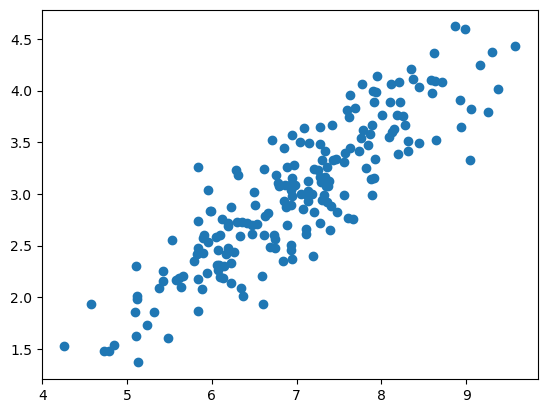

In [86]:
plt.scatter(df['cgpa'],df['package'])

In [87]:
x = df.iloc[:,0:1]
y = df['package']

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [89]:
xtrain.shape, xtest.shape

((160, 1), (40, 1))

In [90]:
ytrain.shape, ytest.shape

((160,), (40,))

In [91]:
def fit_model(trainx, trainy, testx, testy):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    obj = LinearRegression()
    obj.fit(trainx, trainy)
    ypred = obj.predict(testx)
    plt.scatter(testx,testy)
    plt.plot(testx,ypred, color='red')
    plt.xlabel('CGPA')
    plt.ylabel('Package(in lpa)')
    plt.show()
    print("Coefficient (m) : ",obj.coef_)
    print("Offset (b) : ",obj.intercept_)
    print("MAE",mean_absolute_error(testy,ypred)) # in units of y
    print("MSE",mean_squared_error(testy,ypred))
    print("RMSE",np.sqrt(mean_squared_error(testy,ypred))) # in units of y
    print("R2 score ",r2_score(testy,ypred)) # tells the amount of variance explained by the model
    print("Adjusted R2 score ",1-((1-r2_score(testy,ypred))*(xtest.shape[0]-1))/(xtest.shape[0]-1-1))

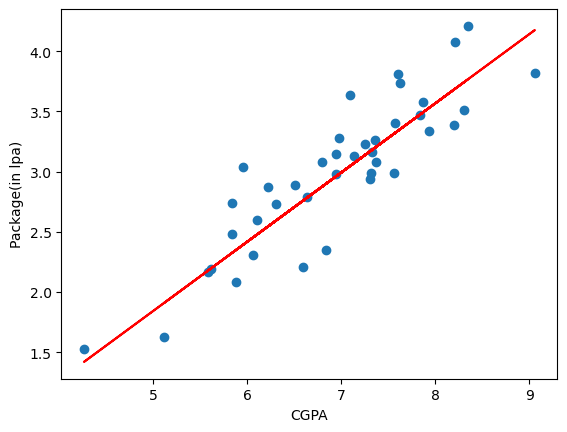

Coefficient (m) :  [0.57425647]
Offset (b) :  -1.0270069374542108
MAE 0.23150985393278373
MSE 0.08417638361329656
RMSE 0.2901316659954521
R2 score  0.7730984312051673
Adjusted R2 score  0.7671273372895138


In [92]:
fit_model(xtrain, ytrain, xtest, ytest)

In [93]:
# y=mx+b

### Now we will see the effect of adding useless column to dataset on R2score and adjusted R2score

<img src = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*kW2xSxbIb7laGRoEcgx8vg.jpeg" alt = 'not found'>

In [94]:
newdf1 = df.copy()

In [95]:
df.shape

(200, 2)

In [96]:
np.random.random(200)

array([0.19063806, 0.92864783, 0.14072026, 0.47450473, 0.97496701,
       0.20479552, 0.04426916, 0.51101858, 0.88615091, 0.05838326,
       0.73447449, 0.74020343, 0.78682945, 0.76100781, 0.09369519,
       0.59180154, 0.12103915, 0.95102804, 0.90743747, 0.60645459,
       0.72234502, 0.69787577, 0.54307659, 0.77432334, 0.30796323,
       0.63797106, 0.12627731, 0.81174921, 0.17741229, 0.92627136,
       0.81220559, 0.66745451, 0.34803625, 0.67865943, 0.67423207,
       0.97913965, 0.14058493, 0.92481483, 0.28688298, 0.15520653,
       0.08154449, 0.4338837 , 0.11065933, 0.76927114, 0.27162937,
       0.63020946, 0.86163498, 0.91987164, 0.39314462, 0.60509577,
       0.92750216, 0.48776906, 0.81715044, 0.06926394, 0.26527002,
       0.64004355, 0.49413112, 0.32430795, 0.87059426, 0.10299444,
       0.39719232, 0.55396531, 0.49660926, 0.30751569, 0.38896686,
       0.38553255, 0.22494699, 0.6274876 , 0.0521154 , 0.83308828,
       0.71936818, 0.10420264, 0.32556734, 0.41210483, 0.21400

In [97]:
newdf1['randomf'] = np.random.random(200)

In [98]:
newdf1

,cgpa,package,randomf
0,6.89,3.26,0.894632
1,5.12,1.98,0.268456
2,7.82,3.25,0.149427
3,7.42,3.67,0.503270
4,6.94,3.57,0.400571
...,...,...,...
195,6.93,2.46,0.374218
196,5.89,2.57,0.505846
197,7.21,3.24,0.307809
198,7.63,3.96,0.810827


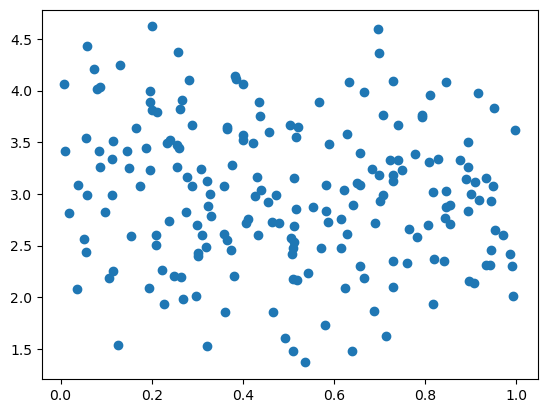

In [99]:
plt.scatter(newdf1.randomf, newdf1.package)

In [100]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(newdf1[['cgpa','randomf']],newdf1['package'],test_size=0.2,random_state=2)

In [113]:
def fit_model_multi_features(trainx, trainy, testx, testy):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    obj = LinearRegression()
    obj.fit(trainx, trainy)
    ypred = obj.predict(testx)
    for col in testx.columns:
        plt.scatter(testx[col],testy)
        #plt.plot(testx[col],ypred, color='red')
        sorted_indices = testx[col].argsort() # chatgpt suggested to sort the values to avoid wierd plot of lines crossing each other
        plt.plot(testx[col].iloc[sorted_indices], ypred[sorted_indices], color='red')
        plt.xlabel(col)
        plt.ylabel('package')
        plt.show()
    print("Coefficient (m) : ",obj.coef_)
    print("Offset (b) : ",obj.intercept_)
    print("MAE",mean_absolute_error(testy,ypred)) # in units of y
    print("MSE",mean_squared_error(testy,ypred))
    print("RMSE",np.sqrt(mean_squared_error(testy,ypred))) # in units of y
    print("R2 score ",r2_score(testy,ypred)) # tells the amount of variance explained by the model
    print("Adjusted R2 score ",1-((1-r2_score(testy,ypred))*(testx.shape[0]-1))/(testx.shape[0]-testx.shape[1]-1))

In [102]:
xtest2.shape[1]

2

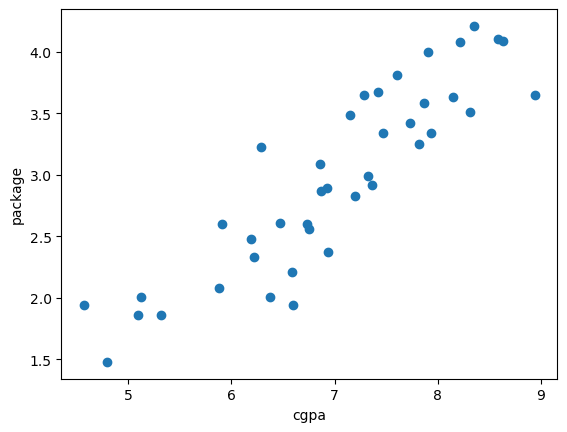

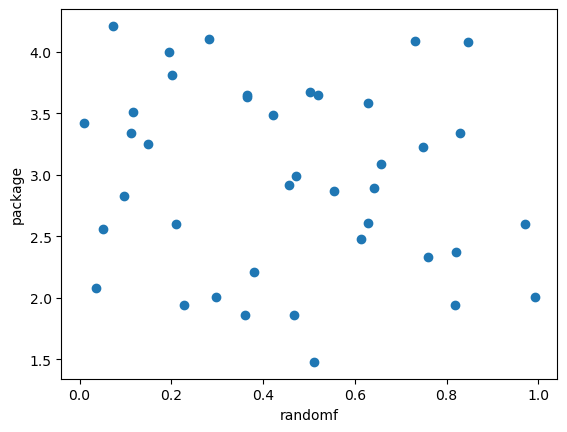

Coefficient (m) :  [ 0.55662535 -0.04652994]
Offset (b) :  -0.8630769941130811
MAE 0.29076609047442226
MSE 0.12096827289375792
RMSE 0.34780493511990007
R2 score  0.7813160131881904
Adjusted R2 score  0.7694952571443088


In [103]:
fit_model_multi_features(xtrain2, ytrain2, xtest2, ytest2)

### Now we will see the effect of adding somewhat useful column to dataset on R2score and adjusted R2score

In [104]:
np.random.randint(-12,12,200)/10

array([-0.4, -1.2,  0.8,  1.1,  0.8,  0.9, -0.8,  0.3, -0.7, -0.8, -0.5,
        0.7,  1. ,  0.9, -0.2, -0.1, -0.5,  1. ,  0.6,  0.8, -0.3,  0.9,
       -0.5,  0.9, -1. , -0.5, -0.4,  0.2,  0.3, -0.3, -1.2, -0.7, -0.3,
       -0.5,  0.4,  0.9, -0.5, -1.1, -1.1,  0.4, -0.2,  0.5, -1.2, -0.4,
       -0.3, -0.8, -1.2, -0.8,  0.7, -0.8,  0.4, -1.1,  0. , -0.9, -0.8,
       -1. , -1.1,  0.4, -1.1,  0.3,  0. ,  1.1, -0.4, -0.7, -0.9,  0.8,
        0.4, -0.2, -0.2, -0.6, -0.2,  1.1, -1. ,  0.7, -1.2,  0.2, -1.2,
        0.2, -0.7, -1.2, -0.8, -0.1, -0.9,  0.1,  0.6, -0.3, -0.8,  1.1,
       -0.2,  0.2,  0.5, -0.8, -1.1, -1.2,  0.2,  0.3,  0.4,  0.4,  0. ,
       -1. , -0.7, -0.6, -1.1,  0. , -1.1, -0.6, -0.7,  0.2,  0.9, -0.7,
        1. , -0.4, -0.4,  1.1,  0.4, -1.2,  0.3, -0.4, -0.7, -0.2, -1.2,
       -1.1, -0.4, -0.6, -0.4, -0.1, -0.9,  0.8, -0.4,  0. ,  0.3,  1. ,
        0.7, -0.3, -0.8, -0.6,  0.1,  1. , -0.6,  0.2,  0.1, -1. , -0.3,
       -1.1, -0.3, -0.4,  1. ,  0.5,  1. , -1.1, -0

In [105]:
newdf2 = df.copy()

newdf2['iq'] = newdf2['package'] + np.random.randint(-12,12,200)/10

In [106]:
newdf2

,cgpa,package,iq
0,6.89,3.26,3.36
1,5.12,1.98,2.78
2,7.82,3.25,2.25
3,7.42,3.67,2.97
4,6.94,3.57,4.57
...,...,...,...
195,6.93,2.46,3.56
196,5.89,2.57,2.67
197,7.21,3.24,2.04
198,7.63,3.96,4.96


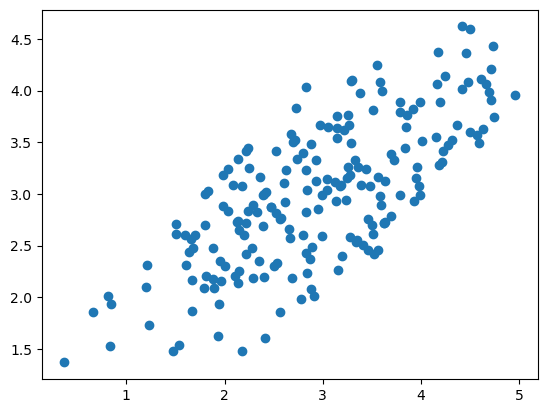

In [107]:
plt.scatter(newdf2.iq, newdf2.package)

In [108]:
np.random.randint(-12,12)

5

In [109]:
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(newdf2[['cgpa','iq']],newdf2['package'],test_size=0.2,random_state=2)

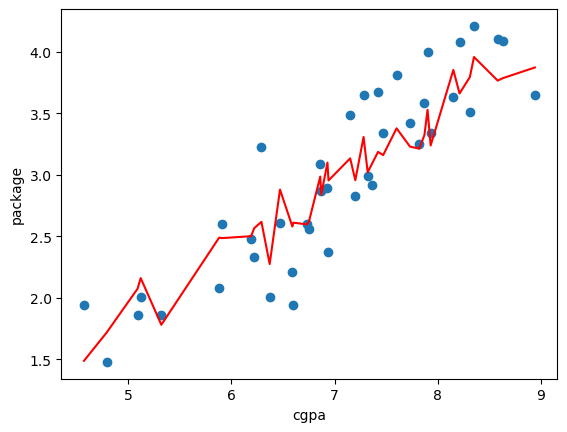

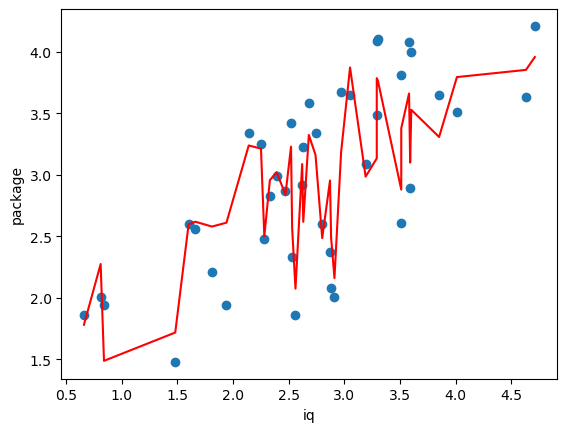

Coefficient (m) :  [0.44031766 0.20778548]
Offset (b) :  -0.6979001692691802
MAE 0.25771930501594636
MSE 0.09449281665272394
RMSE 0.3073968390415294
R2 score  0.8291778052511047
Adjusted R2 score  0.8199441731025158


In [121]:
fit_model_multi_features(xtrain3,ytrain3,xtest3,ytest3)
# i think because of multiple linear regression the model is overfitting 

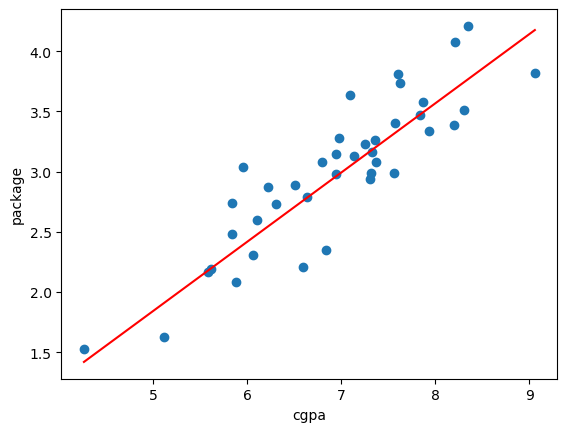

Coefficient (m) :  [0.57425647]
Offset (b) :  -1.0270069374542108
MAE 0.23150985393278373
MSE 0.08417638361329656
RMSE 0.2901316659954521
R2 score  0.7730984312051673
Adjusted R2 score  0.7671273372895138


In [118]:
fit_model_multi_features(xtrain,ytrain,xtest,ytest)